<a href="https://colab.research.google.com/github/AshilPrasad/Machine-learning/blob/main/1_polynomial_regressn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/polynomial.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [ ]:
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [ ]:
df.tail()

,sno,Temperature,Pressure
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [ ]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sno          6 non-null      int64  
 1   Temperature  6 non-null      int64  
 2   Pressure     6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 272.0 bytes


In [ ]:
df.describe()

,sno,Temperature,Pressure
count,6.000000,6.000000,6.000000
mean,3.500000,50.000000,0.066233
std,1.870829,37.416574,0.105467
min,1.000000,0.000000,0.000200
25%,2.250000,25.000000,0.002400
50%,3.500000,50.000000,0.018000
75%,4.750000,75.000000,0.075000
max,6.000000,100.000000,0.270000


In [ ]:
df1=df.drop(columns="sno",axis=1)
df1


,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


Text(0.5, 1.0, 'temperature and itd pressure')

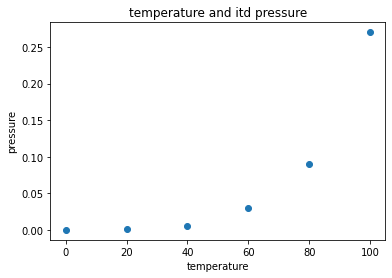

In [ ]:
import matplotlib.pyplot as plt
tem=df["Temperature"]
press=df["Pressure"]
plt.scatter(tem,press)
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.title("temperature and itd pressure")

In [ ]:
x=df1.iloc[:,:-1]
x

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [ ]:
y=df1.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [ ]:
#model creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

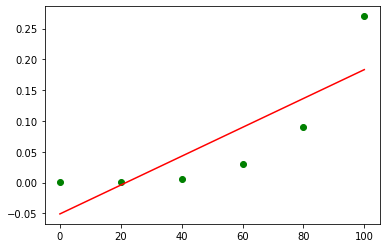

In [ ]:
plt.scatter(x,y,color='g')
plt.plot(x,y_pred,color="red")

In [ ]:
#performence evaluation

#1-mean absolute error

from sklearn.metrics import mean_absolute_error
print("mean absolute error",mean_absolute_error(y,y_pred))

mean absolute error 0.047653333333333346


In [ ]:
# mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
print("error percentage is",mean_absolute_percentage_error(y,y_pred))

error percentage is 44.775078189300416


In [ ]:
#mean squared error
from sklearn.metrics import mean_squared_error
print("mean squared error is",mean_squared_error(y,y_pred))

mean squared error is 0.002870267555555557


In [ ]:
#root mean squared error
RMSE=mean_squared_error(y,y_pred)
squ=np.sqrt(RMSE)
print("root mean squared error is",squ)

root mean squared error is 0.053574878026511244


In [ ]:
#r2 score ===> coefficence of determination
from sklearn.metrics import r2_score
print("r2 score is",r2_score(y,y_pred))

r2 score is 0.690349972603981


In [ ]:
#actual value=  y
#predict_value= y_pred
df2=pd.DataFrame({'actual value':y,'predicted value':y_pred})
df2

,actual value,predicted value
0,0.0002,-0.050867
1,0.0012,-0.004027
2,0.0060,0.042813
3,0.0300,0.089653
4,0.0900,0.136493
5,0.2700,0.183333


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [ ]:
poly.fit(x_poly,y) #to correct diamension

PolynomialFeatures(degree=3)

In [ ]:
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model1.fit(x_poly,y)
y_poly=model1.predict(x_poly)
y_poly

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

Text(0, 0.5, 'pressure')

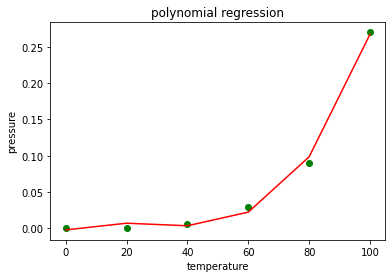

In [ ]:
plt.scatter(x,y,color="g")
plt.plot(x,y_poly,color="r")
plt.title("polynomial regression")
plt.xlabel("temperature")
plt.ylabel("pressure")

In [ ]:
print("mean absolute erroe is",mean_absolute_error(y,y_poly))

mean absolute erroe is 0.004899999999992323


In [ ]:
print("mean absolute percentage error is",mean_absolute_percentage_error(y,y_poly))

mean absolute percentage error is 2.7865912208923658


In [ ]:
print("mean squared error is",mean_squared_error(y,y_poly))

mean squared error is 3.087518518518518e-05


In [ ]:
mse=mean_squared_error(y,y_poly)
rmse=np.sqrt(mse)
print(rmse)

0.005556544356448995


In [ ]:
print("r2 score is",r2_score(y,y_pred))

r2 score is 0.690349972603981


In [ ]:
df3=pd.DataFrame({"actual value":y,"simple_regression":y_pred,"polynomial":y_poly})
df3

,actual value,simple_regression,polynomial
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289
